In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'churn-bigml-80.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
df.shape

(2666, 20)

In [6]:
df.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

###### What is the overall churn rate?

In [8]:
churn_rate = df['Churn'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 14.55%


###### Does having an international plan affect churn?

<Axes: xlabel='International plan'>

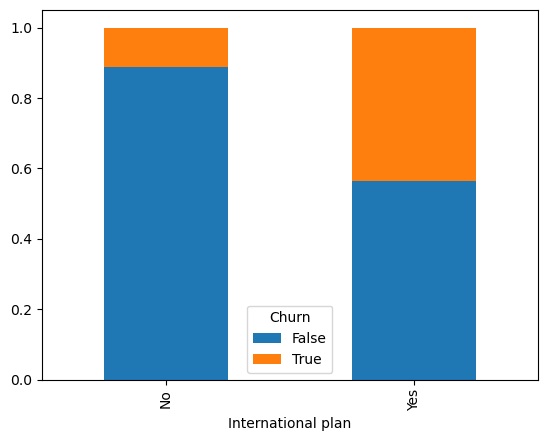

In [10]:
churn_by_intl_plan = pd.crosstab(df['International plan'], df['Churn'], normalize='index')
churn_by_intl_plan.plot(kind='bar', stacked=True)

###### What is the relationship between customer service calls and churn?

<Axes: xlabel='Churn', ylabel='Customer service calls'>

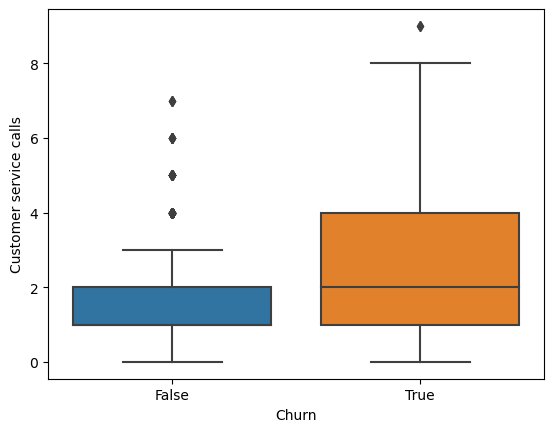

In [11]:
sns.boxplot(x='Churn', y='Customer service calls', data=df)

###### How do call durations and charges differ between churned and retained customers?

<Axes: >

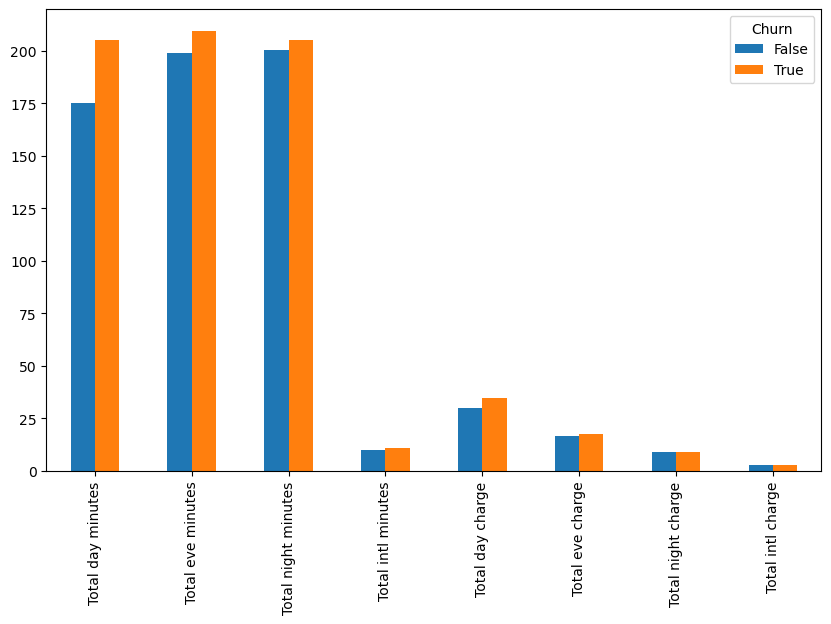

In [12]:
cols = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 
        'Total intl minutes', 'Total day charge', 'Total eve charge', 
        'Total night charge', 'Total intl charge']

df.groupby('Churn')[cols].mean().T.plot(kind='bar', figsize=(10,6))

###### Are certain states experiencing higher churn rates?

<Axes: xlabel='State'>

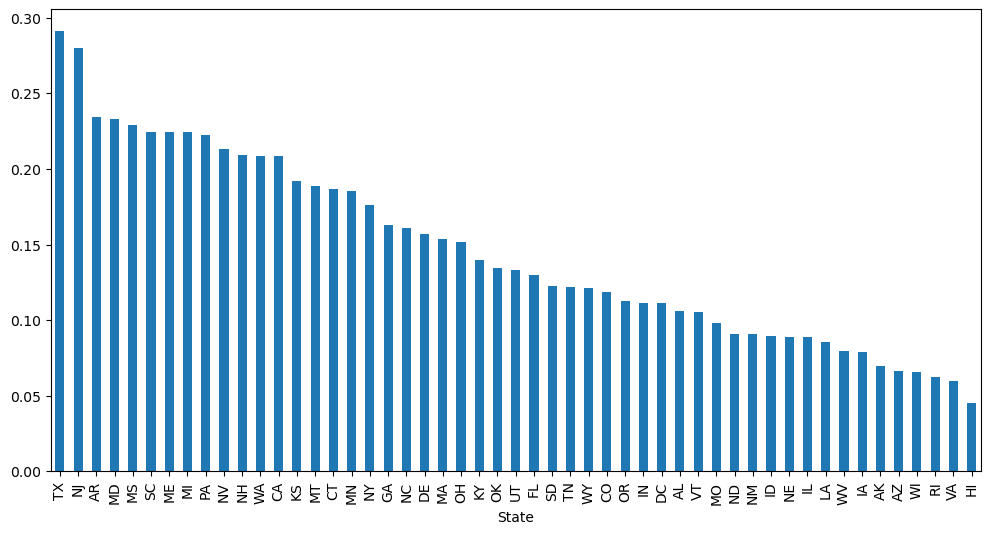

In [13]:
state_churn = df.groupby('State')['Churn'].mean().sort_values(ascending=False)
state_churn.plot(kind='bar', figsize=(12,6))

###### Is there a correlation between account length and churn?

<Axes: xlabel='Account length', ylabel='Count'>

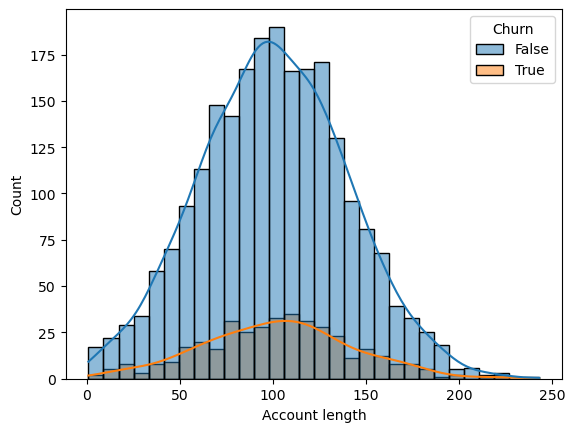

In [14]:
sns.histplot(data=df, x='Account length', hue='Churn', bins=30, kde=True)

###### Does having a voice mail plan reduce churn?

<Axes: xlabel='Voice mail plan'>

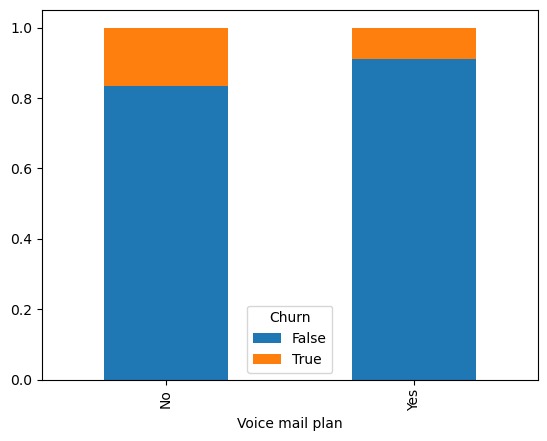

In [15]:
pd.crosstab(df['Voice mail plan'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)

######  How many customer service calls before churn becomes likely?

<Axes: xlabel='Customer service calls'>

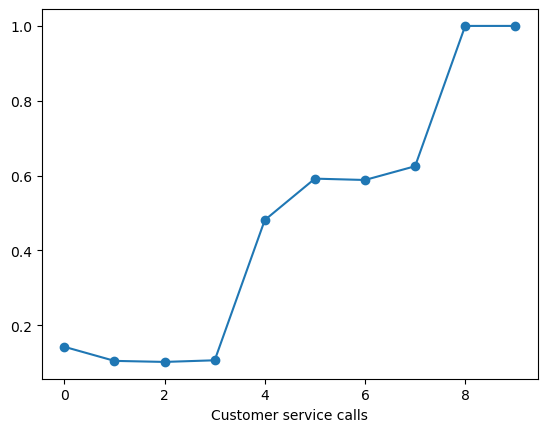

In [16]:
df.groupby('Customer service calls')['Churn'].mean().plot(marker='o')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [18]:
# Encode categorical columns
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['International plan'] = le.fit_transform(df['International plan'])
df_encoded['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])

In [19]:
# Define features and target
X = df_encoded.drop(['Churn', 'State'], axis=1)
y = df_encoded['Churn']


In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
 #Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000),
}

In [31]:
best_score = 0
best_model = None
best_name = ""

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    print(f"\n{name} Accuracy: {score:.4f}")
    print(classification_report(y_test, y_pred))

    if score > best_score:
        best_score = score
        best_model = model
        best_name = name

# Save the best model
joblib.dump(best_model, 'model.pkl')
print(f"\n Best model '{best_name}' saved as 'model.pkl'")


Decision Tree Accuracy: 0.9187
              precision    recall  f1-score   support

       False       0.94      0.97      0.95       683
        True       0.77      0.64      0.70       117

    accuracy                           0.92       800
   macro avg       0.85      0.80      0.83       800
weighted avg       0.91      0.92      0.92       800


Logistic Regression Accuracy: 0.8638
              precision    recall  f1-score   support

       False       0.88      0.98      0.92       683
        True       0.60      0.21      0.31       117

    accuracy                           0.86       800
   macro avg       0.74      0.59      0.62       800
weighted avg       0.84      0.86      0.84       800


 Best model 'Decision Tree' saved as 'model.pkl'
